# Démonstration 1  

## INF5130 - Algorithmique 📔💻🎲  (Hiver 2025)

* Dernière mise à jour: **1/11/2025**
* Mardi le 20 Janvier 2026
* 13h30-15h30, PK-1780 | Complexe des Sciences Pierre-Dansereau
* Atelier présenté par Amanda Boatswain Jacques 👩🏽‍💻🕹️🎧☕

&nbsp;  

*N.B.* : Le pseudocode, les exemples codés et quelques portions des explications ont été générés par ChatGPT. Toutes les figures explicatives ont été créées par moi. Cependant, la version finale des programmes, ainsi que le texte ont tous été retouchés par moi (‼️ **Attention :** parfois ChatGPT générait des choses qui ne fonctionnaient pas comme il faut ou qui n'étaient pas corrects!!!). Finalement, j'ai modifié le pseudocode de chaque algorithme pour correspondre aux conventions de pseudocode présentés par le professeur. 🤸✅

## **Exercice 1**

On considère le problème consistant à additionner deux nombres naturels exprimés dans la base deux, dont les "chiffres" sont stockés dans des tableaux de $n$ éléments. Ces tableaux sont respectivement appelés $A$ et $B$. La somme des deux nombres doit être calculée et placée dans un tableau nommé $C$ et contenant $ n+1 $ éléments.

(a) Écrivez une fonction qui prend en entrée les tableaux $A$ et $B$ et retourne le tableau $C$. (b) Quelle est la complexité de votre algorithme?



**Réponse :**

On suppose que le chiffre le moins significatif se trouve à l'indice
n, et le chiffre le plus significatif à l'indice 0.  L'algorithme parcourt alors les tableaux $A$ et $B$ de droite à gauche (de l'indice $n$ à $0$).

Voici un exemple en utilisant 2 tableaux A et B où $n = 3 $  bits. On se sert d'une variable nommée `retenue`, qui va gérer le report de l'addition lorsque la somme d'une colonne dépasse une valeur de 1. L'opération `addition_binaire` génère un tableau de longueur égal au plus à n + 1 (dans ce cas, 3 + 1 = 4).

&nbsp;  
<img src="https://raw.githubusercontent.com/AmandaBoatswain/INF5130/8b944a86894b1781475678968e7c783b602d5bf3/figures/exercice_1fig1.png" />


**Pseudocode :**

```
1.  Fonction addition_binaire(A, B):
        Entrée :
            A : tableau de n éléments (bits)
            B : tableau de n éléments (bits)
        Sortie :
            C : tableau de n + 1 éléments (bits)

2.      n ← longueur(A)                                   ▷ Nombre d'éléments dans les tableaux A et B
3.      C ← tableau de taille (n + 1) initialisé à 0      ▷ Pour stocker le résultat de la somme
4.      retenue ← 0                                       ▷ Initialiser la retenue à 0

▷ Parcourir les tableaux A et B de droite à gauche
5.      Pour i ← (n - 1) bas 0 (inclus) faire             ▷ Stocker le restant (bit de la somme) à l'indice suivant dans C
6.          somme ← A[i] + B[i] + retenue                 ▷ Additionner les bits alignés correspondants avec la retenue
7.          C[i+1] ← somme mod 2                          ▷ Stocker le restant (bit de la somme) à l'indice suivant dans C
8.          retenue ← somme ÷ 2                           ▷ Le quotient devient la nouvelle retenue
9.      fin Pour

▷ Placer le dernier report dans C[0]
10.     C[0] ← retenue
11.     Retourner C

12. fin Fonction
```

**En Python :**

In [ ]:
def addition_binaire (A, B):
  """
  entrées
  ----------
  A : tableau de n éléments
  B : tableau de n éléments

  sorties
  ----------
  C : tableau de n+1 éléments
  """
  n = len(A)
  C = [0] * (n + 1)  # Créer un tableau de taille n+1 pour stocker le résultat
  retenue = 0  # Initialiser la retenue à 0

  # Parcourir les tableaux A et B de droite à gauche (de l'indice n-1 à 0)
  for i in range(n - 1, -1, -1):
    """ On met -1 pour le dernier argument puisqu'on veut que la boucle
    s'arrête juste avant d'atteindre l'indice -1, donc jusqu'à 0 inclus."""

    # Afficher les variables pour chaque itération pour voir les traces (optionnel)


    print("i : ", i)
    print("A[i] : ", A[i])
    print("B[i] : ", B[i])
    print("Retenue : ", retenue)
    print()
    print("C : ", C)


    somme = A[i] + B[i] + retenue  # Additionner les bits correspondants avec la retenue
    C[i+1] = somme % 2  # Le reste de la division par 2 est le bit à cet indice
    retenue = somme // 2  # Le quotient devient le nouveau report


    if retenue !=0:
      print("Retenue de 1 mise de côté pour n = ", i)
    print()


  # Placer le dernier report dans l'élément C[0]
  C[0] = retenue

  # Ici un bloc de code facultatif pour enlever les zéros au début du résultat final
  if C[0]==0:
    C.pop(0)

  return C


b.   Quelle est la complexité de votre algorithme?

**Réponse :**

* **Complexité en temps** : L'algorithme parcourt une seule fois les tableaux $A$ et $B$, donc la complexité en temps est O($n$), où $n$ est la taille des tableaux $A$ et $B$.
* **Complexité en espace** : L'algorithme utilise un tableau C de taille $n+1$, donc la complexité en espace est aussi en O($n$).


&nbsp;  

On peut illustrer cela en roulant quelques exemples. D'abord on crée une fonction pratique pour générer des nombres binaires aléatoires:

In [ ]:
import random

def generer_nombre_binaire(n):
    # Génère un tableau de n bits aléatoires (0 ou 1)
    return [random.randint(0, 1) for _ in range(n)]

Ensuite, on additionne les deux chiffres et on imprime le résultat:

In [ ]:
# Exemple d'utilisation :

n = 3 # Taille des nombres binaires
A = generer_nombre_binaire(n)
B = generer_nombre_binaire(n)

print("Longueur des tableaux d'entrées: ", len(A))
print("A =", A)
print("B =", B)
print()

C = addition_binaire(A, B)
print("Réponse: C = ", C)
print("Longueur de C: ", len(C))

Longueur des tableaux d'entrées:  3
A = [0, 1, 1]
B = [0, 0, 1]

i :  2
A[i] :  1
B[i] :  1
Retenue :  0

C :  [0, 0, 0, 0]
Retenue de 1 mise de côté pour n =  2

i :  1
A[i] :  1
B[i] :  0
Retenue :  1

C :  [0, 0, 0, 0]
Retenue de 1 mise de côté pour n =  1

i :  0
A[i] :  0
B[i] :  0
Retenue :  1

C :  [0, 0, 0, 0]

Réponse: C =  [1, 0, 0]
Longueur de C:  3


## **Exercice 2**
Soient $A$ et $B$ deux tableaux ayant la même signification que dans l’exercice précédent. On veut maintenant multiplier les nombres représentés par $A$ et $B$ au lieu de les additionner. Le tableau $C$ contiendra la représentation du produit de $A$ et $B$ dans la base deux.



(a)  Quel doit être le nombre d’éléments du tableau $C$ ?

**Réponse :**

Lorsqu'on multiplie deux nombres binaires de longueur $n$, leur produit peut avoir au maximum $2n$ bits. **Explication détaillée donnée au tableau.**

(b) Écrivez une fonction qui prend en entrée  A  et  B , et retourne  C.

**Réponse :**

On peut visualiser les étapes de la multiplication entre deux chiffres binaires avec l'exemple ci-dessous. Dans ce cas, $n = 3$ bits.
&nbsp;  

<img src="https://raw.githubusercontent.com/AmandaBoatswain/INF5130/main/figures/exercice_2fig1.png" />

 Finalement, on peut résoudre le problème en créant un algorithme qui fonctionne en trois étapes:

1. **Copier** : D'abord, on créé une fonction nommée **copier**, qui elle va ajouter des zéros à droite de A en fonction de la position du bit de B actuellement traité. Cela correspond au déplacement à gauche lors de la multiplication.
2.  **Addition des résultats partiels** : Pour chaque bit de $B$, si ce bit est 1, on ajoute $A$ décalé à gauche à un produit partiel à l'aide de la fonction **addition_binaire** (créée dans l'exercice précédent).
3. **Tableau de sortie** : Le tableau final, produit_partiel, est un tableau qui aura au plus $2n$ éléments.






D'abord la procédure `copier` copie les éléments de T à la fin de R, puis les décale de *deca* positions vers la gauche :

**Pseudocode :**

```
1.  Procedure copier(T, R, deca)

        Entrée:
            T : tableau à copier
            R : tableau dans lequel copier
            deca : nombre de positions de décalage
        Sortie:
            Vide

2.      n ← longueur de T           ▷ Longueur du tableau T
3.      m ← longueur de R           ▷ Longueur du tableau R
4.      index_debut ← m - n         ▷ Calculer l'indice de départ pour copier T à la fin de R

        ▷ Copier les éléments de T à la fin de R
5.      Pour j de 0 à n - 1 faire
6.          R[index_debut + j] ← T[j]
7.      fin Pour

        ▷ Décaler les éléments de T de 'deca' positions vers la gauche dans R
8.      Pour j de index_debut à m - 1 faire
9.          Si j - deca >= 0 alors
10.             R[j - deca] ← R[j]
11.         fin Si
12.     fin Pour

        ▷ Remplir les dernières cases de R avec des zéros après le décalage
13.     Pour j de m - deca à m - 1 faire
14.         R[j] ← 0
15.     fin Pour

16. fin Procedure

```



Ensuite, on continue avec la multiplication en ajoutant les sommes partielles.

```
1.  Fonction multiplication_binaire(A, B):

        Entrée :
            A : tableau de n éléments (bits)
            B : tableau de n éléments (bits)
        Sortie :
            C : tableau de 2n éléments (bits)

2.      n ← longueur(A)                                          ▷ Nombre d'éléments dans les tableaux A et B
3.      resPartiel ← tableau de zéros de taille 2n               ▷ Créer un tableau pour le résultat final de la multiplication
4.      temp ← tableau de zéros de taille 2n                     ▷ Initialiser un tableau temporaire pour stocker les résultats intermédiaires

5.      Pour i ← (n - 1) bas 0 faire
6.          si B[i] = 1
7.              copier(A, temp, i)                               ▷ Copier A dans temp, et décaler A vers la gauche de i bits
8.              resPartiel ← addition_binaire(resPartiel, temp)  ▷ Addition partielle des résultats
9.          fin si
10.     fin Pour

11.     C ← resPartiel                                           
12.     retourner C                                              ▷ Retourner le tableau final   

14. fin Fonction
```

**Voici les deux fonctions en python :**

In [ ]:
def copier(T, R, deca):
    """
    Copie les éléments de T à la fin de R, puis les décale de deca positions vers la gauche.
    T : tableau à copier
    R : tableau dans lequel copier
    deca : nombre de positions de décalage
    """
    n = len(T)  # Longueur du tableau T
    m = len(R)  # Longueur du tableau R

    # Calculer l'indice de départ pour copier T à la fin de R
    index_debut = m - n

    # Copier les éléments de T à la fin de R
    for j in range(n):
        R[index_debut + j] = T[j]

    # Ensuite, décaler les éléments de T de deca positions vers la gauche dans R
    for j in range(index_debut, m):
        if j - deca >= 0:
            R[j - deca] = R[j]

    # Remplir les dernières cases après décalage avec des zéros
    for j in range(m - deca, m):
        R[j] = 0

In [ ]:
def multiplication_binaire(A, B):
    """
    Multiplie deux nombres binaires représentés par des tableaux de bits A et B.
    Retourne un tableau contenant le produit.

    Entrées
    ----------
    A : tableau de n éléments (bits)
    B : tableau de n éléments (bits)

    Sorties
    ----------
    C : tableau de 2n éléments (bits)
    """

    n = len(A)
    resPartiel = [0] * (2 * n)  # Créer un tableau de taille 2n pour stocker le résultat final
    temp = [0] * (2 * n)  # Tableau temporaire pour stocker les résultats intermédiaires

    # Parcourir chaque bit de B de la droite à gauche
    for i in range(n-1, -1, -1):

      """
      print("i :", i)
      print("A[i] :", A[i])
      print("B[i] :", B[i])
      """

      if B[i] == 1:
          copier(A, temp, n-1-i)  # Copier A dans temp, décalé de n-1-i positions vers la gauche
          # print("temp apres copier :", temp)
          resPartiel = addition_binaire(resPartiel, temp) # Ajouter temp à resPartiel
          # print("resPartiel apres ajout de temp :", resPartiel)
          temp = [0] * (2 * n)  # Réinitialiser temp après chaque addition

    # Ici un bloc de code facultatif pour enlever les zéros au début du résultat final
    while i < len(resPartiel) and resPartiel[i] == 0:
      resPartiel.pop(i)

    C = resPartiel
    return C

Et voila! ✨ Vous pouvez tester la fonction en roulant quelques exemples.

In [ ]:
# Exemple d'utilisation :
n = 3 # Taille des nombres binaires
A = generer_nombre_binaire(n)
B = generer_nombre_binaire(n)

print("Longueur des tableaux d'entrées: ", len(A))
print("A =", A)
print("B =", B)
print()

C = multiplication_binaire(A, B)
print("C =", C)
print("Longueur de C: ", len(C))

Longueur des tableaux d'entrées:  3
A = [0, 1, 1]
B = [0, 1, 0]

i :  5
A[i] :  0
B[i] :  0
Retenue :  0

C :  [0, 0, 0, 0, 0, 0, 0]

i :  4
A[i] :  0
B[i] :  1
Retenue :  0

C :  [0, 0, 0, 0, 0, 0, 0]

i :  3
A[i] :  0
B[i] :  1
Retenue :  0

C :  [0, 0, 0, 0, 0, 1, 0]

i :  2
A[i] :  0
B[i] :  0
Retenue :  0

C :  [0, 0, 0, 0, 1, 1, 0]

i :  1
A[i] :  0
B[i] :  0
Retenue :  0

C :  [0, 0, 0, 0, 1, 1, 0]

i :  0
A[i] :  0
B[i] :  0
Retenue :  0

C :  [0, 0, 0, 0, 1, 1, 0]

C = [1, 1, 0]
Longueur de C:  3



(c)   Quelle est la complexité de votre algorithme?

**Réponse :**

* **Complexité en temps** : Le premier passage pour calculer les produits partiels prend O(n$^2$), car pour chaque bit de $B$, nous parcourons les $n$ bits de $A$ et ajoutons les résultats partiels. Le second passage pour gérer les retenues prend O(n) car nous parcourons les $2n$ bits de $C$ pour ajuster les retenues.

* **Complexité en espace** : Le tableau $C$ est de taille $2n$, donc l'algorithme utilise O(n) espace.

## **Exercice 3**
Quelle est la plus grande valeur de $n$ telle qu’un algorithme dont le temps d’exécution est $100n^2$ prenne plus de temps qu’un algorithme dont le temps d’exécution est $2^n$?


**Réponse :**

**Approche dichotomique :** La question posée revient à trouver la plus grande valeur de $n$ telle que $100n^2 > 2^{n}$. Pour trouver cette valeur de $n$, on peut adopter une approche "dichotomique" en illustrant la croissance des deux fonctions avec quelques valeurs:   

&nbsp;  


<div align="center">

|          | 1   | 2   | 5     | 10     | 15     | 20        |
|----------|-----|-----|-------|--------|--------|-----------|
| $100n^2$ | 100 | 400 | 2 500 | 10 000 | 22 500 | 40 000    |
| $2^n$    | 2   | 4   | 32    | 1 024  | 32 768 | 1 048 576 |

</div>
&nbsp;  

Si $n$ est égal à 10, 100$n^2$ est égal à 10 000 tandis que $2^n$ est égal à 1024. Si $n$ est égal à 20, 100$n^2$ est égal à 40 000, mais  $2^n$ est supérieur à $10^6$. La valeur de $n$ recherchée est donc comprise entre 10 et 19. Lorsque $n$ est égal à 15, 100$n^2$ (qui est égal à 22 500) est plus petit que 32 000, et donc plus petit que $2^n$, mais les deux valeurs sont proches l’une de l’autre. On peut donc penser que la bonne réponse est 14, et c’est bien le cas, puisque $100 × 14^2$ est égal à 19 600 et $2^{14}$ à 16 384.

&nbsp;  


**Approche graphique :**  On peut aussi visualiser la réponse graphiquement. La librairie **sympy** est utilisé pour définir des expressions symboliques. La fonction
**lambdify** convertit les expressions symboliques en fonctions évaluables numériquement avec numpy. **matplotlib** est utilisé pour tracer les fonctions dans un graphique.

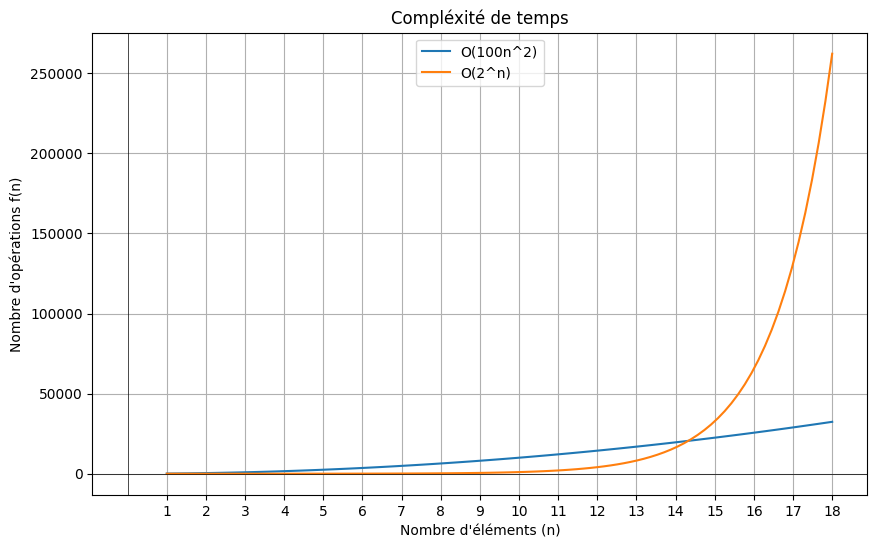

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Définir la variable symbolique
x = sp.symbols('x')

# Définir les expressions symboliques (vous pouvez modifier ou ajouter d'autres fonctions ici)
fonctions = [
    100 * x**2,              # Fonction 100n^2
    2**x                     # Fonction 2^n
]

# Noms des fonctions pour les étiquettes
noms_fonctions = [
    'O(100n^2)',                # Étiquette pour 100n^2
    'O(2^n)'                    # Étiquette pour 2^n
]

# Générer des données numériques pour le tracé
x_vals = np.linspace(1, 18, 100)
plots = []

# Tracer chaque fonction
plt.figure(figsize=(10, 6))

for i, fonction in enumerate(fonctions):
    try:
        # Créer une version numérique de l'expression symbolique
        f_lambdified = sp.lambdify(x, fonction, modules=['numpy'])

        # Évaluer la fonction pour les valeurs de x
        y_vals = f_lambdified(x_vals)

        # Tracer la fonction
        plt.plot(x_vals, y_vals, label=noms_fonctions[i])

    except Exception as e:
        print(f"Erreur lors du tracé de {noms_fonctions[i]} : {e}")

# Ajouter un titre et des étiquettes
plt.title('Compléxité de temps')
plt.xlabel("Nombre d'éléments (n)")
plt.ylabel("Nombre d'opérations f(n)")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Personnaliser les espacements des marques de graduation sur l'axe des x
plt.xticks(np.arange(1, 19, 1))  # Ajustez le pas selon vos besoins

# Ajouter une légende au graphique
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()

On peut voir très bien que les deux fonctions se croisent quand $n$ est environ égal à **14** ($\approx$ 14.32) !

## **Exercice 4**
Soit $T$ un tableau de nombres entiers dont les indices sont compris entre 1 et $n$. Écrivez une fonction qui retourne la valeur VRAI si les éléments de $T$ sont tous distincts et la valeur FAUX dans le cas contraire. La complexité de votre fonction doit être plus petite que $n^2$.

**Réponse :**

L'idée est de partir de l'algorithme de **Tri-Fusion** *(Merge Sort)* pour trier d'abord le tableau. TriFusion est un algorithme de tri diviser-pour-régner qui utilise une approche récursive. Il divise le tableau en sous-listes, trie chaque sous-liste, puis fusionne les sous-listes triées pour former une seule liste. Les 3 étapes principales de l'algorithme sont:

1. **Diviser :**
Si le tableau contient plus d'un élément, on le divise en deux moitiés à peu près égales. On applique ensuite récursivement l'algorithme de TriFusion sur chaque sous-tableau.

2. **Trier :**
Cas de base : si une sous-liste contient un seul élément, elle est déjà triée et la récursion se termine. Si une sous-liste contient plusieurs éléments, elle est divisée à nouveau jusqu'à ce qu'on obtienne des sous-listes d'un seul élément.

3. **Fusionner :**
Une fois les sous-listes divisées en éléments unitaires, on les fusionne deux à deux. La fusion se fait en comparant les éléments des deux sous-listes et en les réorganisant dans un ordre trié.

L'animation ci-dessous montre l'exécution de l'algo avec un tableau de 8 chiffres :

In [ ]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/c/cc/Merge-sort-example-300px.gif')

**Pseudocode :**

```
1.  Procédure fusionner(tab, debut, fin1, fin2, temp)

        Entrée :
            - tab : tableau indicé de 1 à n (inclus)
            - debut, fin1, fin2 : indices entre 1 et n
        Sortie :
            - temp : tableau indicé de 1 à n (inclus), fusion de tab[debut..fin1] et tab[fin1+1..fin2]

2.      Début
3.          i ← debut                                              ▷ Initialise i au début de la première sous-partie
4.          j ← fin1 + 1                                           ▷ Initialise j au début de la deuxième sous-partie

5.          Pour k ← debut à fin2 faire                            ▷ Parcours les indices de la sous-partie à fusionner
6.              Si i ≤ fin1 et (j > fin2 ou tab[i] < tab[j]) alors ▷ Vérifie si l'élément de la première partie doit être copié
7.                  temp[k] ← tab[i]                               ▷ Si tab[i] est plus petit, le place dans temp[k]
8.                  i ← i + 1                                      ▷ Passe à l'élément suivant dans la première sous-partie
9.              Sinon
10.                 temp[k] ← tab[j]                               ▷ Sinon, place tab[j] dans temp[k]
11.                 j ← j + 1                                      ▷ Passe à l'élément suivant dans la deuxième sous-partie
12.             FinSi
13.         FinPour

14.      FinProcédure
```

```
1.  Fonction triFusion(tab, bi, bs)

        Entrée :
            tab : tableau indicé de 1 à n incl.
            bi, bs : indices entre 1 et n
        Sortie :
            tab : tableau indicé de 1 à n incl., trié

2.      Si bi < bs alors                 ▷ Si la portion à trier a plus d'un élément
3.          milieu ← (bi + bs) / 2       ▷ Calcul du milieu du tableau
4.          triFusion(tab, bi, milieu)   ▷ Appels récursifs pour trier chaque moitié
5.          triFusion(tab, milieu + 1, bs)
6.          fusionner(tab, bi, milieu, bs, tabTemp)  ▷ Fusionner les deux moitiés triées

7.          Pour i ← bi à bs faire
8.              tab[i] ← tabTemp[i]      ▷ Copier le contenu de tabTemp dans tab
9.          Fin Pour

10.     Fin Si

11. Fin Fonction

```

**Voici les deux fonctions en python :**

In [ ]:
def fusionner(tab, debut, fin1, fin2, temp):
    """
    Fusionne deux sous-tableaux triés dans un tableau temporaire.

    Paramètres :
    tab (list) : Le tableau source contenant les éléments à fusionner.
    debut (int) : Indice de début du premier sous-tableau.
    fin1 (int) : Indice de fin du premier sous-tableau.
    fin2 (int) : Indice de fin du second sous-tableau.
    temp (list) : Le tableau temporaire qui contiendra la fusion des deux sous-tableaux.
    """

    i = debut  # Initialiser i à l'indice de début du premier sous-tableau
    j = fin1 + 1  # Initialiser j à l'indice de début du second sous-tableau (fin1 + 1)

    # Boucle pour parcourir de debut à fin2 inclus
    for k in range(debut, fin2 + 1):

        # Si i est encore dans les limites du premier sous-tableau et que
        # j est hors limites ou bien que tab[i] est plus petit que tab[j]
        if i <= fin1 and (j > fin2 or tab[i] < tab[j]):

            temp[k] = tab[i]  # Copier l'élément du premier sous-tableau dans temp
            i += 1  # Avancer l'indice du premier sous-tableau
        else:
            temp[k] = tab[j]  # Copier l'élément du second sous-tableau dans temp
            j += 1  # Avancer l'indice du second sous-tableau

In [ ]:
def triFusion(tab, bi, bs):
    """
    Tri un tableau en utilisant l'algorithme de tri par fusion.

    Paramètres :
    tab (list) : Le tableau à trier.
    bi (int) : Indice de début de la portion du tableau à trier.
    bs (int) : Indice de fin de la portion du tableau à trier.

    Sortie :
    tab est trié entre les indices bi et bs.
    """

    if bi < bs:  # Si la portion à trier contient plus d'un élément
        milieu = (bi + bs) // 2  # Calculer le milieu du tableau

        # Appels récursifs pour trier chaque moitié
        triFusion(tab, bi, milieu)
        triFusion(tab, milieu + 1, bs)

        # Tableau temporaire pour la fusion
        tabTemp = tab.copy()

        # Fusionner les deux moitiés triées
        fusionner(tab, bi, milieu, bs, tabTemp)

        # Copier le contenu de tabTemp dans tab
        for i in range(bi, bs + 1):
            tab[i] = tabTemp[i]

 Une fois trié, il est facile de vérifier si les éléments consécutifs sont identiques. On vérifie si l'élément d'avant $T[i - 1]$ est égal à l'élément courant $T[i]$.

In [ ]:
def elements_distincts(T):
    # Tri du tableau avec l'algorithme de Tri-Fusion
    triFusion(T, 0, len(T) - 1)

    # Vérifier si deux éléments consécutifs sont identiques
    for i in range(1, len(T)):
        if T[i] == T[i - 1]:
            return False

    # Si aucun doublon n'a été trouvé, tous les éléments sont distincts
    return True

Un petit test....

In [ ]:
T = [6, 1, 4, 2, 5]
print(elements_distincts(T))  # Renvoie True, car tous les éléments sont distincts

T = [3, 1, 4, 2, 3]
print(elements_distincts(T))  # Renvoie False, car l'élément 3 apparaît deux fois

True
False


Un autre exemple avec un tableau aléatoire :

In [ ]:
import random

def generer_tableau(n, min_val=1, max_val=20):
    """
    Génère un tableau de n entiers positifs aléatoires.

    Arguments :
    - n (int) : nombre d'éléments dans le tableau.
    - min_val (int) : valeur minimale (par défaut : 1).
    - max_val (int) : valeur maximale (par défaut : 100).

    Retourne :
    - list : tableau de n entiers positifs.
    """
    if n <= 0:
        raise ValueError("Le nombre d'éléments doit être supérieur à 0.")
    return [random.randint(min_val, max_val) for _ in range(n)]

In [ ]:
# Exemple d'utilisation
n = 10
tableau = generer_tableau(n)
print("Tableau généré :", tableau)

Tableau généré : [20, 19, 2, 19, 14, 17, 6, 3, 6, 8]


In [ ]:
# Exemple de tri d'un tableau avec triFusion
tab = tableau
triFusion(tab, 0, len(tab) - 1)
print(tab)

[2, 3, 6, 6, 8, 14, 17, 19, 19, 20]


In [ ]:
# Vérifier si tous les éléments sont distincts
T = tab
print("Tableau :", T)
print("Éléments distincts :", elements_distincts(T))

Tableau : [2, 3, 6, 6, 8, 14, 17, 19, 19, 20]
Éléments distincts : False


**Complexité temporelle :**

*   Le tri-fusion a une complexité de O($n\log⁡n$).
*   La vérification des doublons prend O($n$).
*   Ainsi, la complexité globale est ($n\log⁡n$ + $n$), donc O($n\log⁡n$), ce qui est conforme à la contrainte demandée.

⭐ ***Bonus*** ⭐


On peut même faire encore mieux... Pour vérifier si tous les éléments d'un tableau $T$ sont distincts avec une complexité inférieure à O($n^2$), nous pouvons utiliser une approche basée sur les ensembles (**sets**). Un ensemble est, par définition, une collection d'objets *distincts*.  L'idée est de parcourir les éléments du tableau une seule fois et de vérifier si chaque élément a déjà été vu.


Voici une solution avec une complexité temporelle de O($n$), où $n$ est la taille du tableau, en utilisant un ensemble pour stocker les éléments uniques rencontrés au fur et à mesure.

In [ ]:
def elements_distincts(T):
    # Utilisation d'un ensemble pour stocker les éléments uniques
    vus = set()

    # Parcourir tous les éléments du tableau
    for element in T:
        # Si l'élément est déjà dans l'ensemble, ce n'est pas distinct
        if element in vus:
            return False
        # Sinon, on l'ajoute à l'ensemble
        vus.add(element)

    # Si tous les éléments sont uniques, retourner VRAI
    return True

In [ ]:
T = [2, 1, 4, 7, 5]
print(elements_distincts(T))  # Renvoie True, car tous les éléments sont distincts

T = [3, 1, 4, 4, 3]
print(elements_distincts(T))  # Renvoie False, car l'élément 3 apparaît deux fois


True
False


**Complexité temporelle:**

*   Nous parcourons chaque élément du tableau une seule fois, donc la complexité de la boucle est O($n$).
*   L'insertion et la vérification d'existence dans un ensemble se font en temps constant O(1) en moyenne.
*   Cela donne une complexité globale de O($n$), ce qui est inférieur à O($n^2$).



## **Exercice 5**
Soit $x$ une valeur entière et $T$ un tableau de nombres entiers dont les indices sont compris entre 1 et $n$. Écrivez une fonction qui retourne la valeur VRAI s’il existe deux éléments de $T$ dont la somme est égale à $x$, et la valeur FAUX dans le cas contraire. La complexité de votre fonction doit être plus petite que $n^2$.

**Réponse :**

**Approche Brute Force :** D'abord, on peut essayer l'approche *Brute Force*, qui consiste à parcourir chaque élément du tableau, essayer toutes les paires possibles d'éléments dans le tableau T, et vérifier si leur somme est égale à $x$.

Pseudocode pour la fonction `existeSommeBruteForce` :

```
1:  fonction existeSommeBruteForce:

        Entrée :
            - T : tableau d'entiers
            - x : nombre entier (valeur de la somme recherchée)
        Sortie :
            - Booléen

2:      n ← taille de T                    ▷ Initialiser la variable n avec la taille du tableau T
3:      Pour i de 1 à n-1 faire            ▷ Parcourir chaque élément du tableau, sauf le dernier, car il n'aura pas de paire à comparer
4:          Pour j de i+1 à n faire
5:              si T[i] + T[j] = x alors   ▷ Vérifier si la somme de T[i] et chaque élément qui le suit (T[j]) est égale à x
6:                  retourner VRAI
7:          fin Pour
8:      fin Pour
9:      retourner FAUX                     ▷ Si aucune paire n'est trouvée après avoir parcouru tout le tableau, retourner FAUX
10: fin fonction

```

 Cette approche utilise deux boucles imbriquées pour tester toutes les paires possibles. Cependant, la complexité temporelle de cette méthode est O($n^2$), il faut trouver une meilleure solution...  

**Approche Trifusion :** On peut aussi réutiliser l'algorithme de *triFusion* de l'exercice précédent pour ordonner le tableau et le parcourir plus facilement. Ensuite, l'algorithme fonctionne en utilisant une approche de recherche à deux pointeurs $i$ et $j$.

À chaque itération de la boucle, la condition $T[i] + T[j]$ (i.e: l'invariant) est vérifiée :

*   Si $T[i] + T[j] < x$, on augmente $i$ pour essayer des sommes plus grandes.
*   Si $T[i] + T[j] > x$, on diminue $j$ pour essayer des sommes plus petites.
*   Si $T[i] + T[j] = x$, on a trouvé la solution.


L'idée est de vérifier progressivement si la somme de deux éléments du tableau est égale à $x$, tout en réduisant la recherche en déplaçant les pointeurs (soit vers la gauche, soit vers la droite) dépendemment de si la somme est inférieure ou supérieure à $x$.

Cette méthode permet de trouver la paire d'éléments (si présent) en temps linéaire après le tri, c'est-à-dire en $O(n\log⁡n)$ pour le tri et $O(n)$ pour la recherche.

**Pseudocode :**

```
1: fonction ilYaUneSomme(T : tableau indexé de 0 à n, x : entier): booléen

2:     T ← triFusion(T)  ▷ Trier le tableau avec un tri fusion
3:     trouver ← Faux    ▷ Initialisation d'une variable booléenne à Faux
4:     i ← 1             ▷ Pointeur i commence à l'indice 1
5:     j ← n          ▷ Pointeur j commence à l'indice n (fin du tableau)

6:     tant que ¬ trouver ∧ i < j faire
           ▷ Invariant de boucle : T[k] + T[p] = x et k < p implique que k et p sont dans l’intervalle [i,j]
7:         si T[i] + T[j] < x alors
8:             i ← i + 1         ▷ Incrémenter i pour augmenter la somme
9:         sinon si T[i] + T[j] > x alors
10:             j ← j - 1         ▷ Décrémenter j pour diminuer la somme
11:         sinon
12:             trouver ← Vrai    
13:         fin si
14:     fin tant que

15:     retourner trouver     
16: fin fonction

```



⭐ ***Bonus*** ⭐

Finalement, on peut aussi, encore une fois, utiliser les ensembles pour réduire la recherche d'une deuxième valeur complémentaire, atteignant ainsi une complexité en O($n$) ce qui est la plus rapide des 3 cas présentés.  

Voici les étapes de l'algorithme avec les ensembles:

1.   Nous parcourons chaque élément du tableau.
2.   Pour chaque élément $T[i]$, nous calculons le complément, c'est-à-dire $x - T[i]$.
3.   Si ce complément a déjà été vu (en utilisant un ensemble), cela signifie que nous avons trouvé deux éléments dont la somme est égale à $x$.
4.   Si ce complément n'a pas été vu, nous ajoutons l'élément courant à l'ensemble.
5.   Si nous parcourons tout le tableau sans trouver de telle paire, nous retournons FAUX.

**Pseudocode :**

```
1: fonction existeSomme(T: tableau d'entiers, x: entier) : booléen
2:     ensemble_vus ← ensemble_vide()                          ▷ Initialiser un ensemble vide pour garder la trace des éléments visités

3:     pour chaque élément dans T faire                        ▷ Parcourir chaque élément dans T
4:         complement ← x - élément                            ▷ Calculer le complément qui permettrait d'obtenir x
5:         si complement est dans ensemble_vus alors           ▷ Vérifier si le complément a déjà été vu
6:             retourner VRAI
7:         ajouter élément à ensemble_vus                      ▷ Ajouter l'élément courant à l'ensemble des vus
      fin pour

8:     retourner FAUX                                          ▷ Si aucune paire n'est trouvée, retourner FAUX
9: fin fonction

```



Voici la fonction `existe_somme` (utilisant les ensembles) écrite en python :

In [ ]:
def existe_somme(T: list[int], x: int) -> bool:
    ensemble_vus = set()  # Initialiser un ensemble vide pour garder la trace des éléments visités

    for element in T:  # Parcourir chaque élément dans T
        complement = x - element  # Calculer le complément qui permettrait d'obtenir x

        if complement in ensemble_vus:  # Vérifier si le complément a déjà été vu
            return True

        ensemble_vus.add(element)  # Ajouter l'élément courant à l'ensemble des vus

    return False  # Si aucune paire n'est trouvée, retourner FAUX
